<a href="https://colab.research.google.com/github/darieyr/BDS3_2025_ML_in_bioimage_analysis/blob/main/notebooks/eng/2_1_Image_channels_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load bunch of images with channels saved in separate files



**29-07-2025**<br>

Created for Biological Data School (BDS^3) 2025 <br>

**Autor:** *Daryna Yakymenko*

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import re
import os
import tifffile as tiff
from tifffile import imread
import numpy as np

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Our path
folder_path = "/content/drive/MyDrive/BDS3_2025_data/ETP /"
#Choose all the files in .tiff format
file_list = [f for f in os.listdir(folder_path) if f.endswith('.tif')]

In [ ]:
%time
# Extract unique base names (without _C1, _C2, _C3 before .tif)
base_names = set()
for f in file_list:
    if '_C' in f:
        base_name = f.split('_C')[0]
        base_names.add(base_name)

#Sort base names for consistency:
base_names = sorted(list(base_names))

#Template for extracting cycle phase name from the file name:
pattern = re.compile(r'1h-1h_(.+?)_Pos') #with usage of RegEx packade (re)

#Data storage list: each item is [C1, C2, C3]
dict = {}

for name in base_names:
    match = pattern.search(name)
    if not match:
        continue
    phase = match.group(1)

    c1_path = os.path.join(folder_path, f"{name}_C1.tif")
    c2_path = os.path.join(folder_path, f"{name}_C2.tif")
    c3_path = os.path.join(folder_path, f"{name}_C3.tif")

    if all(os.path.exists(p) for p in [c1_path, c2_path, c3_path]):
        #add to dictionary
        if phase not in dict:
            dict[phase] = []
        dict[phase].append([c1_path, c2_path, c3_path])
    else:
        print(f"Lack of a channel for: {name}")
#results format will be like:
#{'G': [[c1_path, c2_path, c3_path], ...], 'SIII': [...], ...}

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.54 µs


In [ ]:
print("Phases:")
for phase in dict:
    print(f"- {phase}")

Phases:
- SIII
- SII
- SIV-V
- SI
- G


In [ ]:
for phase in dict:
    count = len(dict[phase])
    print(f"Phase '{phase}' contains {count} samples(sample_index: 0)")

Phase 'SIII' contains 1 samples(sample_index: 0)
Phase 'SII' contains 1 samples(sample_index: 0)
Phase 'SIV-V' contains 1 samples(sample_index: 0)
Phase 'SI' contains 1 samples(sample_index: 0)
Phase 'G' contains 1 samples(sample_index: 0)


In [ ]:
#show first image -> [0], second channel - [1]
image_path = dict["SIII"][0][1] #dict[phase][sample_index][channel]
our_image = imread(image_path)

In [ ]:
our_image.shape

(99, 512, 512)

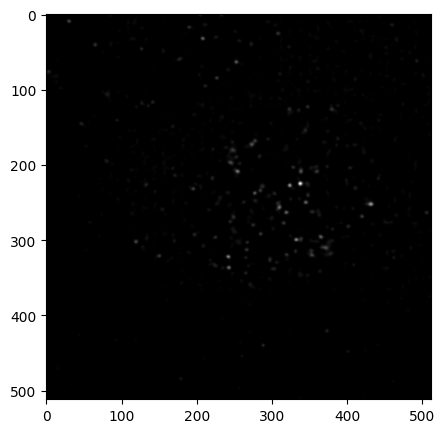

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(our_image[55, :, :], cmap = "Grays_r")

In [ ]:
def process_images(image_data):
    for image in image_data:
        print(imread(image).shape)
    #return (image.shape)

#to call the function, you need:
shape = process_images(dict["G"][0])
#print(shape)


(99, 512, 512)
(99, 512, 512)
(99, 512, 512)
